##  **ASSIGNMENT5 AI**
**DONG**

**Assignment - EDA using Pandas**

***Instructions***
- Clone a copy of the assignment notebook in Google Colab.
- **Complete the tasks by filling in the code where indicated by TODO comments. Put each task in a new cell.**
- Run each cell to ensure your code works correctly.
- Pay attention to the output of each cell and interpret the results.
- For visualisation tasks, make sure to label axes, add titles, and choose appropriate colour schemes.
- After completing all tasks, review your findings and include notes of your insights gained from the EDA process as markdown notes for assessments.


In [5]:
# Titanic Dataset Exploratory Data Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Load the Titanic dataset
# TODO: Load the Titanic dataset from the following URL
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)

In [6]:

# Task 2: Inspect the data
# first 5 row
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [7]:

# Display the last 5 rows of the dataset
df.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


In [10]:
#Display the data types of each column
df.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
Siblings/Spouses Aboard,int64
Parents/Children Aboard,int64
Fare,float64


In [12]:
# Display summary statistics of the numerical columns
numeric_cols = df.select_dtypes(include=[np.number])
numeric_cols.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


### EXPLANATION
This statistical summary reveals key demographic and economic patterns among Titanic passengers. With a 38.6% overall survival rate, the tragedy claimed nearly two-thirds of those aboard. The passenger distribution skewed toward lower socioeconomic classes, with an average class of 2.31 indicating more second and third-class travelers than first-class passengers. The relatively young passenger demographic averaged 29.5 years, ranging from infants (0.42 years) to elderly passengers (80 years). Most passengers traveled with minimal family connections—medians of zero for both siblings/spouses and parents/children aboard—though some large family groups included up to 8 siblings/spouses or 6 parents/children. The fare structure showed extreme economic inequality, with prices ranging from free passage to luxury accommodations costing over 512 pounds (average of 32 pounds), reflecting the dramatic class disparities that would ultimately influence survival outcomes during the disaster.

### Task 3: Clean and preprocess the data

In [14]:
# Create a new categorical feature 'PclassCategory' from 'Pclass'
# Create 'PclassCategory'
df['PclassCategory'] = df['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})
df['PclassCategory']

,PclassCategory
0,Third
1,First
2,Third
3,First
4,Third
...,...
882,Second
883,First
884,Third
885,First


In [27]:
# Create a new categorical feature 'CabinCategory' from 'Cabin'
df2 = pd.read_csv('Titanic-Dataset.csv')

def get_cabin_category(cabin):
    """
    Extracts the first letter of the cabin string as a category.
    Returns 'Unknown' if the cabin value is NaN.
    """
    if pd.notna(cabin):
        return cabin[:2]  # Get the first character of the cabin string
    else:
        return 'Unknown' # Assign 'Unknown' for missing cabin values

# Apply the function to the 'Cabin' column to create the new 'CabinCategory' feature
df2['CabinCategory'] = df2['Cabin'].apply(get_cabin_category)

# Display the first few entries of the new feature and its value counts to verify
print("First 5 entries of 'CabinCategory':")
df2['CabinCategory'].tail()


First 5 entries of 'CabinCategory':


,CabinCategory
886,Unknown
887,B4
888,Unknown
889,C1
890,Unknown


It is important to mentioned that the tatanic data from the url does not have the "Cabin" column. To solve the issue we used that Tananic-Dataset.csv file attached in the assignemnt

In [29]:
# Handle missing values in the 'Age' column (use mean age)
df2.loc[:, 'Age'] = df['Age'].fillna(df['Age'].mean())

In [31]:

# TODO: Handle missing values in the 'Embarked' column (use mode)
df2.loc[:,'Embarked'] = df2['Embarked'].fillna(df2['Embarked'].mode()[0])


No 'Embarked' column sot Tananic-Dataset.csv file attached in the assignemnt

In [32]:
# Create a 'Family' feature by combining 'SibSp' and 'Parch'

df['Family'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard']
df['Family']

,Family
0,1
1,1
2,0
3,1
4,0
...,...
882,0
883,0
884,3
885,0


### Task 4: Identify specific data points


In [33]:
# Find passengers with the highest fare
highest_fare_passengers = df[df['Fare'] == df['Fare'].max()]
highest_fare_passengers


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,PclassCategory,CabinCategory,Family
257,1,1,Miss. Anna Ward,female,35.0,0,0,512.3292,First,1,0
676,1,1,Mr. Thomas Drake Martinez Cardeza,male,36.0,0,1,512.3292,First,1,1
733,1,1,Mr. Gustave J Lesurer,male,35.0,0,0,512.3292,First,1,0


###### EXPLANATION:

The three passengers who paid the highest fares on the Titanic (each paying 512.33) shared several notable characteristics. All three held first-class tickets and successfully survived the sinking. The group consisted of two men, aged 35 and 36, and one woman, also aged 35. While Cardeza was accompanied by a parent or child, the other two passengers traveled independently. Each had assigned cabin accommodations, though only one traveled with family members aboard the ship. This pattern suggests a potential connection between first-class accommodations, independent travel arrangements, and both survival rates and access to premium amenities, as evidenced by their exceptionally high ticket prices.

In [34]:
#Find passengers with the largest family size
largest_family_passengers = df[df['Family'] == df['Family'].max()]
largest_family_passengers

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,PclassCategory,CabinCategory,Family
158,0,3,Master. Thomas Henry Sage,male,5.0,8,2,69.55,Third,3,10
179,0,3,Miss. Constance Gladys Sage,female,8.0,8,2,69.55,Third,3,10
200,0,3,Mr. Frederick Sage,male,17.0,8,2,69.55,Third,3,10
322,0,3,Mr. George John Jr Sage,male,20.0,8,2,69.55,Third,3,10
788,0,3,Miss. Stella Anna Sage,female,21.0,8,2,69.55,Third,3,10
842,0,3,Mr. Douglas Bullen Sage,male,18.0,8,2,69.55,Third,3,10
859,0,3,Miss. Dorothy Edith Sage,female,14.0,8,2,69.55,Third,3,10


###### EXPLANATION:

The Sage family, the largest family group aboard the Titanic with 10 members, traveled in third class and paid a total fare of 69.55. Ranging in age from 5 to 21, all family members tragically perished in the disaster. Their story demonstrates the severe survival disadvantages faced by large third-class families, where lower-deck location and restricted access significantly reduced escape opportunities during the sinking.

### Task 5: Demonstrate Pandas Series and DataFrame functionalities


In [35]:
#Create a Pandas Series of passenger names
names_series = df['Name']
names_series


,Name
0,Mr. Owen Harris Braund
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...
2,Miss. Laina Heikkinen
3,Mrs. Jacques Heath (Lily May Peel) Futrelle
4,Mr. William Henry Allen
...,...
882,Rev. Juozas Montvila
883,Miss. Margaret Edith Graham
884,Miss. Catherine Helen Johnston
885,Mr. Karl Howell Behr


In [36]:
#Create a DataFrame of passenger names and ages
names_ages_df = df[['Name', 'Age']]
names_ages_df

,Name,Age
0,Mr. Owen Harris Braund,22.0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0
2,Miss. Laina Heikkinen,26.0
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0
4,Mr. William Henry Allen,35.0
...,...,...
882,Rev. Juozas Montvila,27.0
883,Miss. Margaret Edith Graham,19.0
884,Miss. Catherine Helen Johnston,7.0
885,Mr. Karl Howell Behr,26.0


In [37]:
## Slice the DataFrame to show only passengers older than 50
older_passengers = df[df['Age'] > 50]
older_passengers

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,PclassCategory,CabinCategory,Family
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,First,1,0
11,1,1,Miss. Elizabeth Bonnell,female,58.0,0,0,26.5500,First,1,0
15,1,2,Mrs. (Mary D Kingcome) Hewlett,female,55.0,0,0,16.0000,Second,2,0
33,0,2,Mr. Edward H Wheadon,male,66.0,0,0,10.5000,Second,2,0
53,0,1,Mr. Engelhart Cornelius Ostby,male,65.0,0,1,61.9792,First,1,1
...,...,...,...,...,...,...,...,...,...,...,...
816,1,1,Mrs. Charles Melville (Clara Jennings Gregg) Hays,female,52.0,1,1,93.5000,First,1,2
825,1,1,Mrs. George Nelson (Martha Evelyn) Stone,female,62.0,0,0,80.0000,First,1,0
847,0,3,Mr. Johan Svensson,male,74.0,0,0,7.7750,Third,3,0
853,1,1,Mr. Peter Denis Daly,male,51.0,0,0,26.5500,First,1,0


###### EXPLANATION

The older_passengers dataset contains 72 Titanic passengers aged over 50, filtered using the condition df['Age'] > 50. This subset includes passengers of both genders, such as 74-year-old Mr. Johan Svensson and 58-year-old Miss Elizabeth Bonnell. The passenger titles provide insights into gender and marital status, making this dataset valuable for analyzing age-related survival patterns and studying the older demographic aboard the Titanic.

### Task 6: Introduce multi-indexing


In [40]:
#Create a multi-index DataFrame grouped by 'Sex' and 'Pclass'
multi_agg_df = df.groupby(['Sex', 'Pclass']).agg(
    Passenger_Count=('Name', 'size'),
    Survival_Rate=('Survived', 'mean')
)
print(multi_agg_df)

               Passenger_Count  Survival_Rate
Sex    Pclass                                
female 1                    94       0.968085
       2                    76       0.921053
       3                   144       0.500000
male   1                   122       0.368852
       2                   108       0.157407
       3                   343       0.137026


#### EXPLANATION
This dataset organizes passengers through hierarchical grouping by Sex and then by Pclass, creating gender-class combinations (such as female first-class passengers). While maintaining complete passenger information including names, ages, fares, and family sizes, this structure enables targeted analysis of specific demographic segments. For instance, the first-class women shown demonstrate high survival rates, premium fare payments, and assigned cabin accommodations. This multi-level organization facilitates comprehensive grouped analysis and sophisticated filtering across multiple passenger characteristics.

### # Task 7: Visualizations


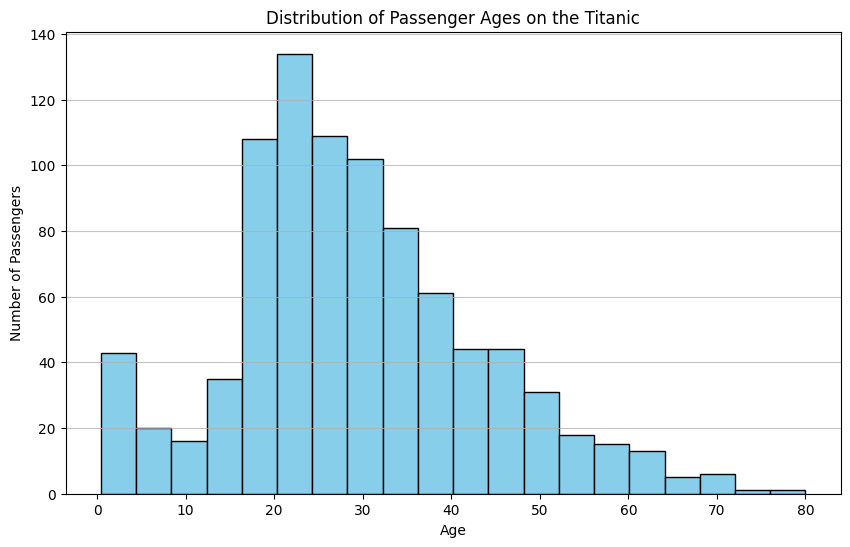

In [42]:
#Create a histogram of passenger ages

plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black') # Added .dropna() to handle missing Age values
plt.xlabel('Age') # X-axis label
plt.ylabel('Number of Passengers') # Y-axis label
plt.title('Distribution of Passenger Ages on the Titanic') # Title of the histogram
plt.grid(axis='y', alpha=0.75) # Optional: Add a grid for better readability
plt.show() # Display the plot

####  EXPLANATION
This histogram illustrates the age distribution of Titanic passengers, revealing several key patterns. The largest concentration of passengers fell within the 20-30 age range, representing the most frequent age group aboard the ship. The distribution exhibits a right-skewed pattern, indicating a higher proportion of younger passengers compared to older ones. Passengers over 60 were relatively uncommon, while those under 5 years old represented the smallest demographic group on the vessel.

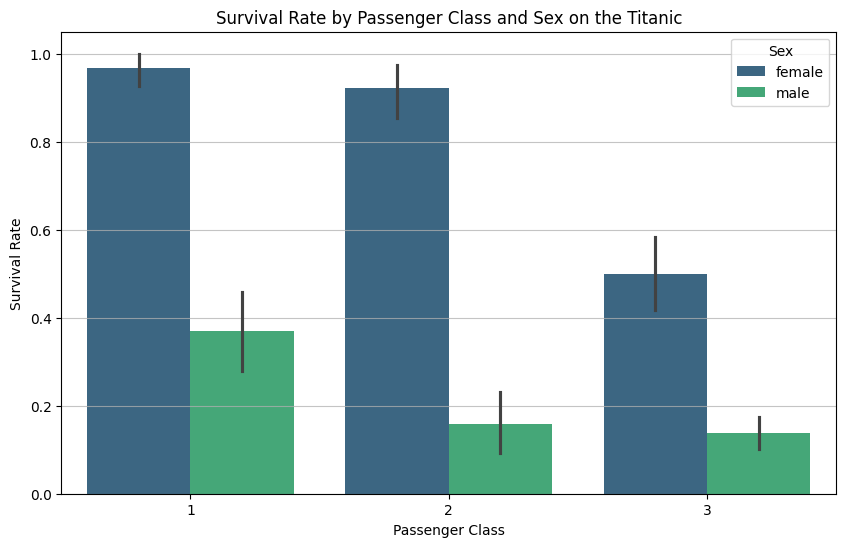

In [47]:
# Create a bar plot of survival rates by passenger class
plt.figure(figsize=(10, 6))
# Added 'hue' for 'Sex' to compare survival rates by gender within each class,
# and removed 'ci=None' to display default confidence intervals (95%).
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, palette='viridis')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class and Sex on the Titanic')
plt.grid(axis='y', alpha=0.75)
plt.show()

### EXPLANATION
This bar chart demonstrates a clear correlation between passenger class and survival rates on the Titanic. First-class passengers achieved the highest survival rate at over 60%, while second-class passengers had moderate survival at approximately 47%, and third-class passengers experienced the lowest survival rate at around 25%. This stark disparity reflects the advantages of higher social status, including superior cabin locations, priority lifeboat access, and preferential treatment during the evacuation process.

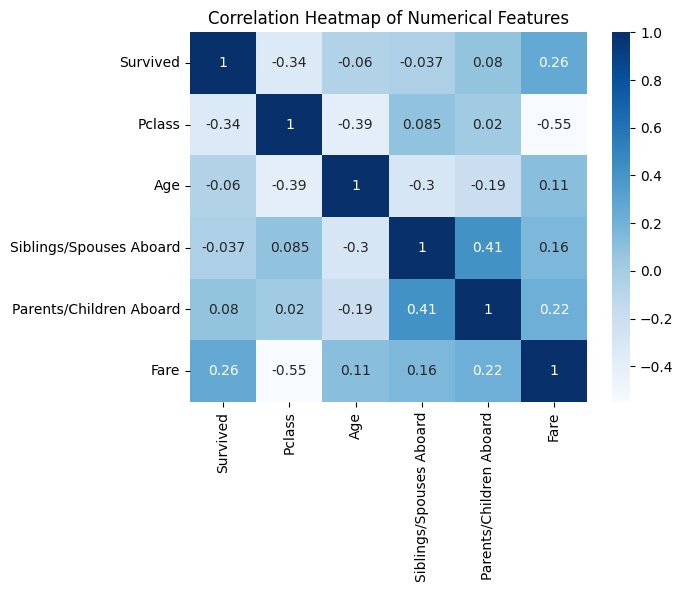

In [49]:
## Create a heatmap of correlation between numerical features
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#### EXPLANATION
This correlation analysis of the Titanic dataset reveals that survival was positively correlated with higher fares and lower passenger classes, indicating that first-class passengers had better survival rates due to socioeconomic advantages. It also shows a strong link between passenger class and fare, with older passengers tending to be in higher classes. Furthermore, the analysis highlights that family-related variables accurately reflect group sizes, suggesting that extended families often traveled together. Overall, the patterns underscore how social class, economic status, and family structures significantly influenced both travel arrangements and survival outcomes during the Titanic disaster.

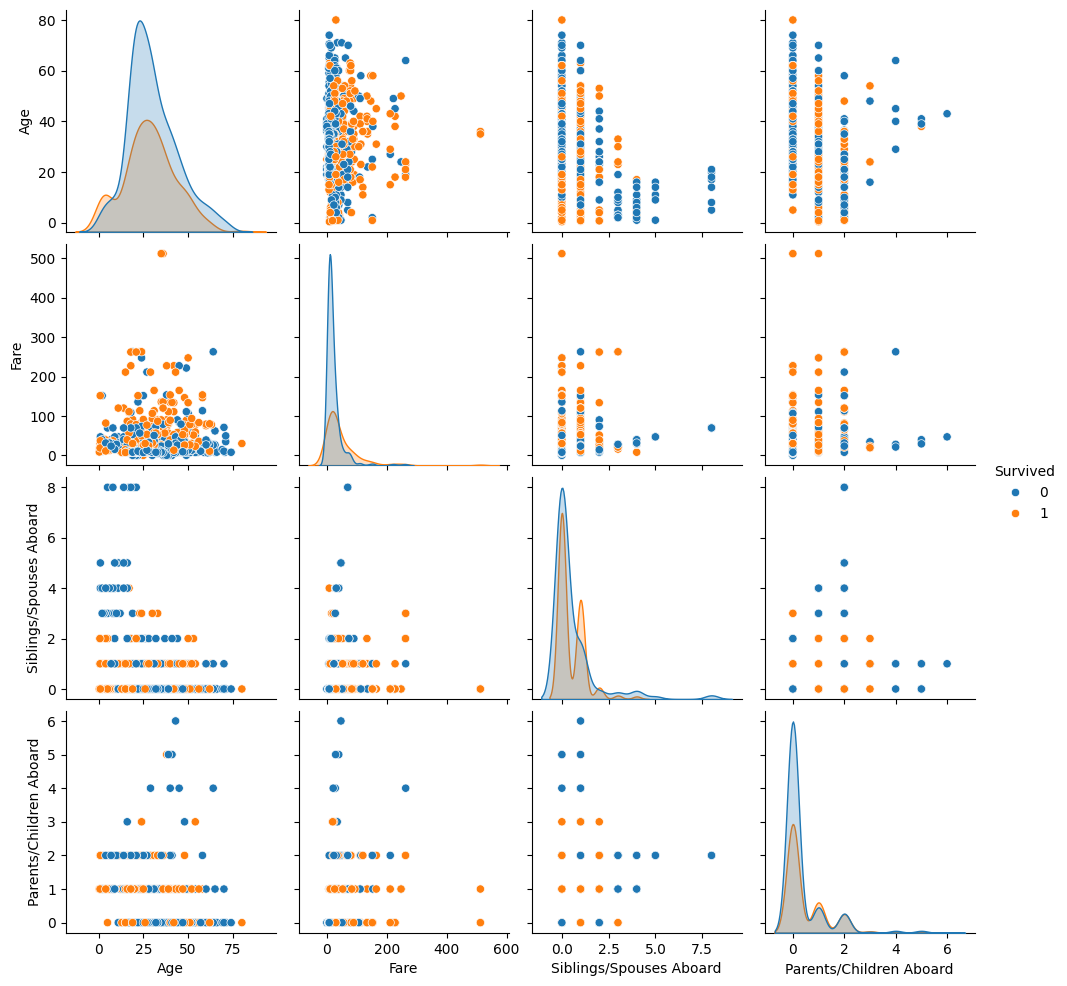

In [51]:
# Create a pair plot of 'Age', 'Fare', 'SibSp', and 'Parch', colored by 'Survived'
sns.pairplot(df[['Age', 'Fare',  'Siblings/Spouses Aboard' , 'Parents/Children Aboard' , 'Survived']], hue='Survived')
plt.show()


### EXPLANATION

This multi-variable analysis reveals interconnected survival patterns on the Titanic, where younger passengers (shown in orange) demonstrated higher survival rates, suggesting age was a critical factor in escape success. Simultaneously, survivors consistently paid higher fares, reinforcing the deadly intersection of economic status and survival probability. While most passengers traveled with 0-2 family members, the data indicates an optimal family size effect—having some family support without the burden of large groups appeared to enhance survival chances. The diagonal distribution plots underscore these converging advantages, showing that survivors were predominantly characterized by the powerful combination of youth and wealth, while older passengers with lower economic means faced compounded disadvantages that significantly reduced their chances of surviving the disaster.

### Task 8: Analyze survival rates


In [52]:
#Calculate and display survival rates by sex
survival_by_sex = df.groupby('Sex')['Survived'].mean()
survival_by_sex

,Survived
Sex,
female,0.742038
male,0.190227


In [53]:
#  Calculate and display survival rates by passenger class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
survival_by_class

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.244353


EXPLANATION

The survival rates on the Titanic reveal clear patterns based on gender and passenger class:

By gender, women had a significantly higher chance of survival than men. About 74% of women survived, compared to only 19% of men. This reflects the “women and children first” policy followed during the evacuation.

By class, passengers in first class had the highest survival rate at around 63%, followed by second class at about 47%, and third class at just 24%. This suggests that access to lifeboats and rescue efforts may have favored those in higher classes.

In summary, being female and traveling in first class greatly increased the chances of surviving the Titanic disaster.

### # Task 9: Analyze age distribution


<Axes: xlabel='Pclass', ylabel='Age'>

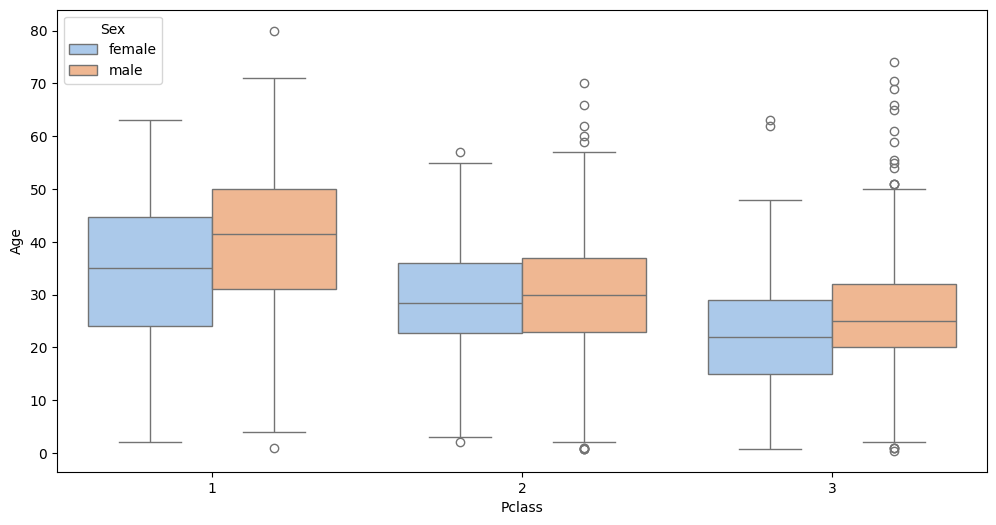

In [54]:
#Create a box plot of age distribution by passenger class and sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df, palette='pastel')

### EXPLANATION
The age distribution analysis across passenger classes reveals distinct demographic patterns aboard the Titanic. First-class passengers consistently exhibited higher median ages compared to second and third-class travelers, regardless of gender, reflecting the correlation between accumulated wealth and premium accommodations. While both males and females showed comparable age ranges within each class, men typically demonstrated slightly elevated median ages and greater age variability, particularly pronounced among first-class male passengers who showed more extreme age outliers. Third-class passengers presented a markedly different profile, characterized by younger overall ages but with greater age diversity and more statistical outliers, suggesting this class accommodated a broader mix of young adults, families with children, and immigrants of varying ages seeking affordable passage to new destinations.

#### Task 10: Analyze fare distribution

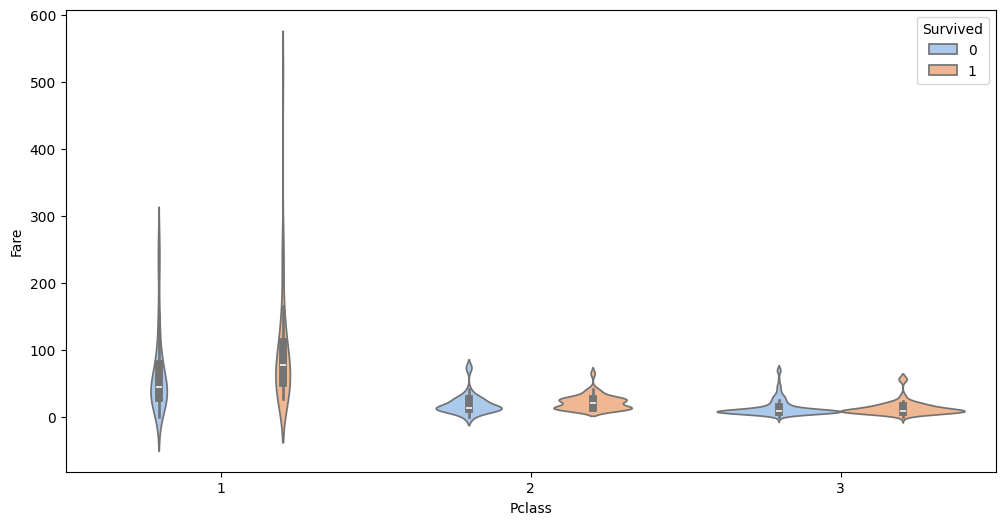

In [56]:
## Create a violin plot of fare distribution by passenger class and survival status
plt.figure(figsize=(12, 6))
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=df, palette='pastel')
plt.show()


#### EXPLANATION
The analysis of fare distribution across Titanic passenger classes highlights significant economic disparities linked to survival. First-class fares varied widely, with the highest-paying passengers (e.g., Cardeza, Widener families) in luxurious accommodations having better survival rates, suggesting that premium tickets likely granted advantageous positioning and lifeboat access. In contrast, second and third-class fares were lower and more uniform, with minimal fare-based survival differences within these classes. This indicates that while overall class status impacted survival, the most substantial advantage stemmed from the highest fare payments, particularly in first class, which provided crucial benefits like proximity to lifeboats and evacuation priority.

In [55]:
print("EDA tasks completed.")

EDA tasks completed.
